# Data Preprocessing / Cleaning
These are the following steps taken to preprocess/clean the data.

1. <a href="#convert_cat_data">Convert Categorical Data</a> 
   * There are several features that need to be converted
2. <a href="#convert_data_types">Convert Data Types</a> 
   * There is no data that needs conversion in this data set
3. <a href="#drop_features">Dropping non-essential features</a>
   * There is one feature that would be dropped due to it not affecting the outcome
4. <a href="#resolve_nan">Resolving Nan values</a>
   * Four features have numerous NaN values.
5. <a href="#dealing_with_outliers">Identifying / Resolving Outliers</a>
   * There are numerous outliers found in the four features above
6. <a href="#ML">Machine Learning Training</a>
   * Training Random Forest models
   * Training Support Vector Machine models
   * Both of these will have data with and without outliers

## Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_train_df = pd.read_csv('./Loan_App_Data/train.csv')
loan_test_df = pd.read_csv('./Loan_App_Data/test.csv')

In [3]:
loan_train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


✅ Data has successfully loaded


## Data Preprocessing 
<a id="convert_cat_data"></a>

### Converting Categorical Data


In [4]:
def convertData(df, cols):
    for feature in cols:
        newdf = pd.get_dummies(df[feature])
        newdf = pd.get_dummies(df[feature],drop_first=True)
        df = pd.concat([df,newdf],axis=1)
        df.drop([feature],axis=1,inplace=True)
        if len(newdf.columns) == 1:
            df.rename({newdf.columns[0]: feature},inplace=True, axis='columns')
    return df
df = convertData(loan_train_df,['Gender', 'Married','Education','Self_Employed','Loan_Status','Property_Area','Dependents'])
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
0,LP001002,5849,0.0,NaN,360.0,1.0,1,0,0,0,1,0,1,0,0,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,0,1,0,0,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,0,0,0,0,1,0,0,0,0,0
610,LP002979,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,LP002983,8072,240.0,253.0,360.0,1.0,1,1,0,0,1,0,1,1,0,0
612,LP002984,7583,0.0,187.0,360.0,1.0,1,1,0,0,1,0,1,0,1,0


✅ All categorical data has been converted over. 

<a id="convert_data_types"></a>

## Converting DataTypes

In [5]:
# Seeing our datatypes
df.dtypes

Loan_ID               object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Gender                 uint8
Married                uint8
Education              uint8
Self_Employed          uint8
Loan_Status            uint8
Semiurban              uint8
Urban                  uint8
1                      uint8
2                      uint8
3+                     uint8
dtype: object

✅ There is no need to convert any of the feature's data.

<a id="drop_features"></a>

## Removing non-essential data

In [6]:
# We don't need Loan_ID since its just an identifier. It has no correlation to anything and will not affect our outcomes
print(f"Unique Loan_ID {len(df['Loan_ID'].unique())}")
print(f"Total Rows: {len(df)}")

Unique Loan_ID 614
Total Rows: 614


In [7]:
df.drop(['Loan_ID'], axis=1, inplace=True)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,1,0,1,0,0,0
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,0,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,1,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,0,0,1,0,1,1,0,0
612,7583,0.0,187.0,360.0,1.0,1,1,0,0,1,0,1,0,1,0


✅ Non-Essential features have been removed from the data set.

<a id="resolve_nan"></a>

## Dealing with missing values

In [8]:
# There seems to be missing values scattered around the features.
print(f"Are there any NaN values: {df.isnull().values.any()}")
display(df.isnull().sum().sort_values(ascending=False))

Are there any NaN values: True


Credit_History       50
LoanAmount           22
Loan_Amount_Term     14
ApplicantIncome       0
CoapplicantIncome     0
Gender                0
Married               0
Education             0
Self_Employed         0
Loan_Status           0
Semiurban             0
Urban                 0
1                     0
2                     0
3+                    0
dtype: int64

<AxesSubplot:>

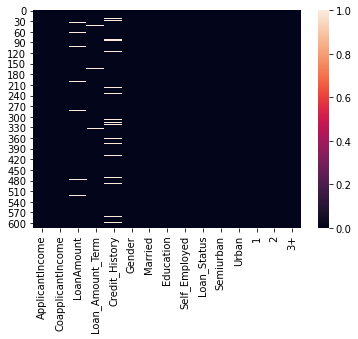

In [9]:
sns.heatmap(df.isnull())

Is there a relationship between someone not having a Loan_Amount_Term, LoanAmount, or CreditHistory and being approved / denied a loan?

<AxesSubplot:>

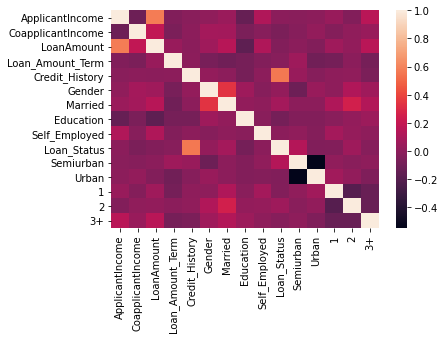

In [10]:
sns.heatmap(df.corr())

There seems to be a strong relationship between "Credit History" and "Loan_Status" along with "ApplicantIncome" and "LoanAmount".

In [11]:
df[['Credit_History','Loan_Status']]

,Credit_History,Loan_Status
0,1.0,1
1,1.0,0
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
609,1.0,1
610,1.0,1
611,1.0,1
612,1.0,1


Text(0.5, 1.0, 'Comparing Credit History with Loan Status')

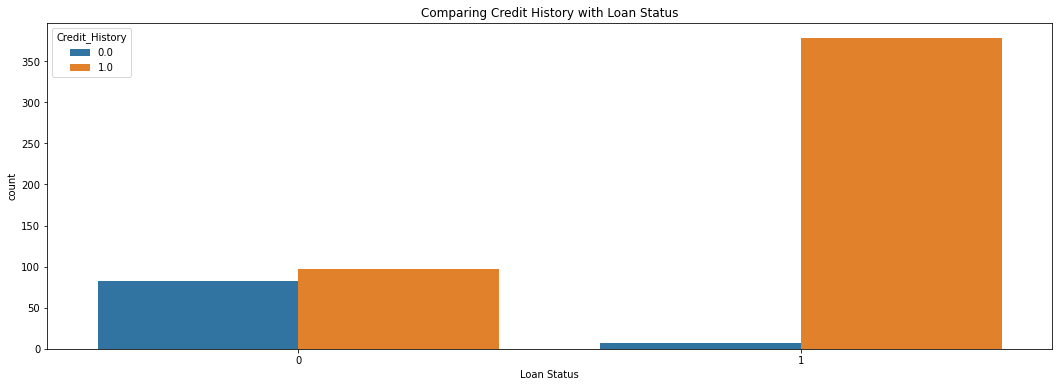

In [12]:
plt.figure(figsize = (18,6))
sns.countplot(x='Loan_Status', hue='Credit_History',data=df);
plt.xlabel("Loan Status")
plt.title("Comparing Credit History with Loan Status")

❓ It is safe to assume that if the Credit History is zero (bad Credit Card History) then the chances of being approved for a loan is low. Can we also assume that if we replace Nan values with zeros this will still hold true?

All Nan values are located within the "Credit History", "LoanAmount", "Loan_Amount_Term" features.
These are the following methods to choose from: 

1. [ ] ~~Deleting Rows with missing values~~
2. [ ] ~~Replace all Nan values with zeros~~
3. [X] Impute missing values for continuous variables
4. [ ] ~~Impute missing values for categorical variable~~
5. [ ] ~~Other Imputation Methods~~
6. [ ] ~~Using Algorithms that support missing values~~ //Both Support Vector and Random Forest require complete data sets
7. [ ] ~~Prediction of missing values~~

### Lets play around with mean values in place of missing values

In [13]:
# Creating as save state
mean_df = df.copy()
# Converting all NaN values to mean of the feature
def convert_NaN_To_Mean(old_df, features):
    for feature in features:
        mean = old_df[feature].mean()
        old_df[feature] = old_df[feature].replace(np.nan, mean)
    return old_df
mean_df = convert_NaN_To_Mean(mean_df,['Credit_History','Loan_Amount_Term','LoanAmount'])

mean_df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Education            0
Self_Employed        0
Loan_Status          0
Semiurban            0
Urban                0
1                    0
2                    0
3+                   0
dtype: int64

In [14]:
mean_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,1,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,1,1,0,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,1,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,0,0,1,0,1,1,0,0
612,7583,0.0,187.000000,360.0,1.0,1,1,0,0,1,0,1,0,1,0


<AxesSubplot:>

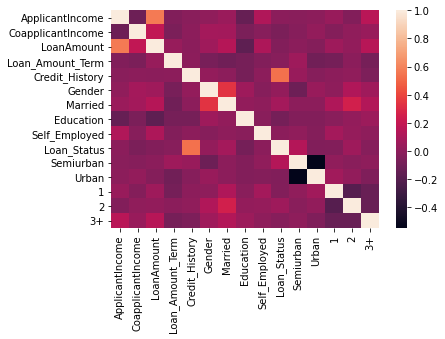

In [15]:
sns.heatmap(mean_df.corr())

✅ NaN values have been resolved in our dataset.

<a id="dealing_with_outliers"></a>

## Identifying / Resolving Outliers

In [16]:
mean_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.796417,0.648208,0.218241,0.133550,0.687296,0.379479,0.328990,0.166124,0.164495,0.083062
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.402991,0.477919,0.413389,0.340446,0.463973,0.485653,0.470229,0.372495,0.371027,0.276201
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The following features have a range of values: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_term, 

### Observe IQR scores
Reference: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [63]:
cont_df = mean_df.copy()
#cont_df.drop(['3+','2','1','Urban','Semiurban', 'Loan_Status','Self_Employed','Education','Married','Gender','Credit_History'], axis=1, inplace=True)

Q1 = cont_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].quantile(0.25)
Q3 = cont_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].quantile(0.75)

IQR = Q3 - Q1
print(IQR)


ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
dtype: float64


In [64]:
print(cont_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] < (Q1 - 1.5 * IQR)) or (cont_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] > (Q3 + 1.5 * IQR))

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0              False              False       False             False
1              False              False       False             False
2              False              False       False             False
3              False              False       False             False
4              False              False       False             False
..               ...                ...         ...               ...
609            False              False       False             False
610            False              False       False              True
611            False              False       False             False
612            False              False       False             False
613            False              False       False             False

[614 rows x 4 columns]


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
609,False,False,False,False
610,False,False,False,False
611,False,False,False,False
612,False,False,False,False


## Showing BoxPlots for Outliers before dropping points

### Applicant Income

<AxesSubplot:xlabel='ApplicantIncome'>

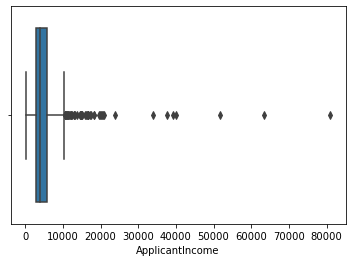

In [51]:
sns.boxplot(x=mean_df['ApplicantIncome'])

### Co-applicant Income

<AxesSubplot:xlabel='CoapplicantIncome'>

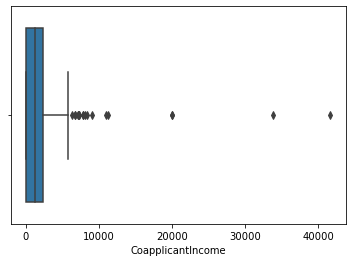

In [20]:
sns.boxplot(x=mean_df['CoapplicantIncome'])

### Loan Amount

<AxesSubplot:xlabel='LoanAmount'>

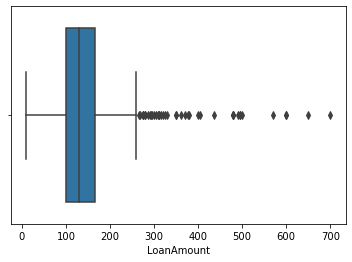

In [21]:
sns.boxplot(x=mean_df['LoanAmount'])

### Loan Amount Term

<AxesSubplot:xlabel='Loan_Amount_Term'>

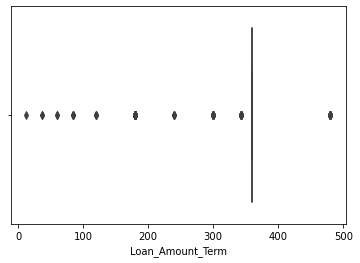

In [22]:
sns.boxplot(x=mean_df['Loan_Amount_Term'])

### Removing the outliers

In [66]:
updated_mean_df = cont_df[~((cont_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] < (Q1 - 1.5 * IQR)) |(cont_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] > (Q3 + 1.5 * IQR))).any(axis=1)]
updated_mean_df.shape
print(f"Original Shape: {cont_df.shape}")
print(f"Updated Shape: {updated_mean_df.shape}")
updated_mean_df

Original Shape: (614, 15)
Updated Shape: (445, 15)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,1,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,1,1,0,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3232,1950.0,108.000000,360.0,1.0,1,1,0,0,1,0,0,0,0,0
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,1,0,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,0,0,1,0,1,1,0,0
612,7583,0.0,187.000000,360.0,1.0,1,1,0,0,1,0,1,0,1,0


### Redrawing updated columns

<AxesSubplot:xlabel='ApplicantIncome'>

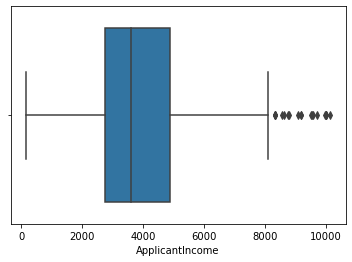

In [86]:
sns.boxplot(x=updated_mean_df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

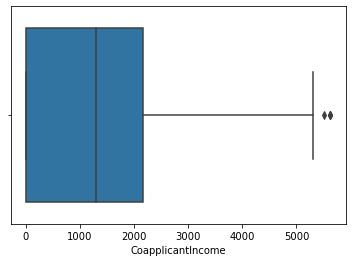

In [85]:
sns.boxplot(x=updated_mean_df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount'>

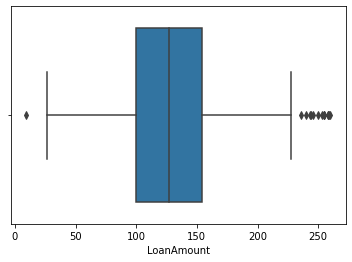

In [84]:
sns.boxplot(x=updated_mean_df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term'>

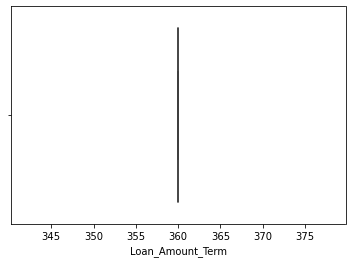

In [83]:
sns.boxplot(x=updated_mean_df['Loan_Amount_Term'])

Does Loan_Amount_Term affect the outcome of a loan decision?

### Copy over results

In [67]:
canidate_df = updated_mean_df.copy()
canidate_df.shape

(445, 15)

✅ Outliers have been removed from the dataset as "canidate_df"

## Saving our data to be used in the implementation

In [159]:
# Stores our cleaned data but contains outlieres.
#mean_df.to_csv('cleaned_data.csv')
# This data has been cleaned along with outliers removed.
#canidate_df.to_csv('cleaned_data_without_outliers.csv')
mean_df.to_pickle('cleaned_data_loan_approval.pkl')
canidate_df.to_pickle('cleaned_data_loan_approval_without_outliers.pkl')

## The Machine Learning Training

In [100]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,roc_auc_score, roc_curve
from sklearn.svm import SVC


#### Spliting our data

In [69]:
# Base Model
X = mean_df[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Gender', 'Married', 'Education', 'Self_Employed','Semiurban','Urban','1','2','3+' ]]
y = mean_df['Loan_Status']

# With outliers removed
X_1 = canidate_df[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Gender', 'Married', 'Education', 'Self_Employed','Semiurban','Urban','1','2','3+' ]]
y_1 = canidate_df['Loan_Status']


### Training Random Forest Model

#### Training Random Forest with outliers

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
forest_pred = forest.predict(X_test)

In [72]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55        63
           1       0.76      0.93      0.83       122

    accuracy                           0.76       185
   macro avg       0.75      0.68      0.69       185
weighted avg       0.76      0.76      0.74       185



#### Training Random Forest without outliers

In [73]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size = 0.3, random_state = 100)

forest_1 = RandomForestClassifier(n_estimators = 100)
forest_1.fit(X_train_1,y_train_1)

forest_pred_1 = forest_1.predict(X_test_1)
print(classification_report(y_test_1, forest_pred_1))

              precision    recall  f1-score   support

           0       0.63      0.34      0.44        35
           1       0.80      0.93      0.86        99

    accuracy                           0.78       134
   macro avg       0.72      0.64      0.65       134
weighted avg       0.76      0.78      0.75       134



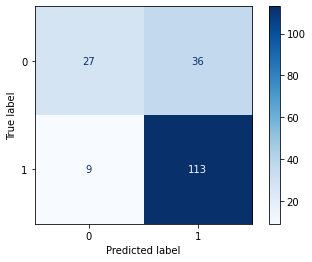

In [96]:
plot_confusion_matrix(forest, X_test,y_test, cmap=plt.cm.Blues)

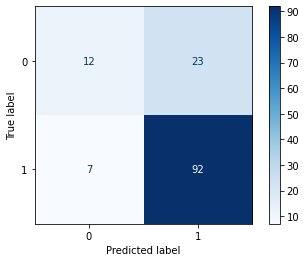

In [97]:
plot_confusion_matrix(forest_1, X_test_1,y_test_1, cmap=plt.cm.Blues)

In [124]:
def feature_plot(coef, columns,y_title = 'coefficients'):
    feature_imp = pd.DataFrame(coef.T, columns = ['importance'])
    feature_imp['feature'] = columns
    feature_imp.sort_values(by=['importance'], ascending = False, inplace = True)
    feature_imp.plot(x = 'feature', kind = 'bar', figsize = (16,4))
    plt.title(y_title)
    plt.ylabel(y_title)
# Removing the target from the feature names
feature_names = list(mean_df.columns)
feature_names.remove('Loan_Status')
feature_names

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Semiurban',
 'Urban',
 '1',
 '2',
 '3+']

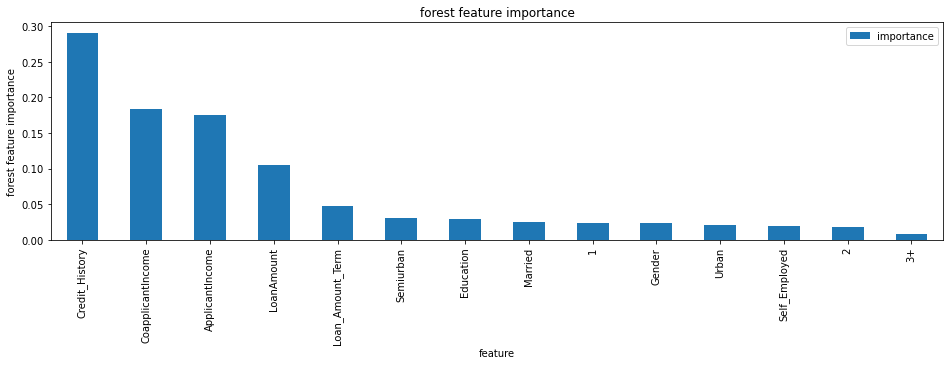

In [123]:
feature_plot(coef= forest.feature_importances_, columns=feature_names, y_title='forest feature importance')

### ROC Curve

In [125]:
from time import time
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [126]:
forest_RS = RandomForestClassifier(n_estimators = 20)

In [128]:
param_distribution = {
    'max_depth':[2,3],
    'max_features': randint(1,13),
    'min_samples_split': randint(2,13),
    'criterion': ['gini','entropy']
}

In [129]:
n_iter_search = 15

In [131]:
random_search_rfc = RandomizedSearchCV(forest_RS, param_distributions= param_distribution, n_iter = n_iter_search, cv = 5)

In [135]:
start = time()
random_search_rfc.fit(X_train,y_train)
print(f'RandomizedSearchCV took {round((time() - start), 2)} iterations of searches on given parameter {n_iter_search}')
print(f'Random Search Best Score: {random_search_rfc.best_score_}')
print(f'Random Search Best Estimator: {random_search_rfc.best_estimator_}')
print(f'Random Search Best Params: {random_search_rfc.best_params_}')
print(f'Random Search Results: {random_search_rfc.cv_results_.keys()}')

RandomizedSearchCV took 1.67 iterations of searches on given parameter 15
Random Search Best Score: 0.8228454172366622
Random Search Best Estimator: RandomForestClassifier(max_depth=2, max_features=6, min_samples_split=4,
                       n_estimators=20)
Random Search Best Params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'min_samples_split': 4}
Random Search Results: dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [143]:
random_search_rfc_pred = random_search_rfc.predict(X_test)
print(confusion_matrix(y_test, random_search_rfc_pred))
print(classification_report(y_test, random_search_rfc_pred))

[[ 25  38]
 [  3 119]]
              precision    recall  f1-score   support

           0       0.89      0.40      0.55        63
           1       0.76      0.98      0.85       122

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185



### Grid Search CV

In [146]:
rfc_GS = RandomForestClassifier(n_estimators=20)
param_grid = {
    'max_depth': [2,3],
    'max_features': [3,5,13],
    'min_samples_split': [2,3,13],
    'criterion': ['gini','entropy']
}

In [148]:
grid_search_rfc = GridSearchCV(rfc_GS,param_grid=param_grid,cv=5)
start = time()
grid_search_rfc.fit(X_train,y_train)
print(f'GridSearchCV took {time() - start} for ')
print(len(grid_search_rfc.cv_results_['params']))
print('candidate parameter settings.')

GridSearchCV took 4.508592367172241 for 
36
candidate parameter settings.


In [149]:
print(f'Best Score: {round((grid_search_rfc.best_score_),3)}')
print(f'Best Params: {grid_search_rfc.best_params_}')

Best Score: 0.823
Best Params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 5, 'min_samples_split': 2}


In [150]:
grid_search_rfc_pred = grid_search_rfc.predict(X_test)
print(confusion_matrix(y_test, grid_search_rfc_pred))
print(classification_report(y_test, grid_search_rfc_pred))

[[ 25  38]
 [  3 119]]
              precision    recall  f1-score   support

           0       0.89      0.40      0.55        63
           1       0.76      0.98      0.85       122

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185



In [151]:
rfc_prob = forest.predict_proba(X_test)
random_search_rfc_prob = random_search_rfc.predict_proba(X_test)
grid_search_rfc_prob = grid_search_rfc.predict_proba(X_test)
y_test.head()

253    1
506    1
365    0
265    1
260    1
Name: Loan_Status, dtype: uint8

In [153]:
y_test_01 = y_test.astype('category').cat.codes
y_test_01.head() # just to reconfirm

253    1
506    1
365    0
265    1
260    1
dtype: int8

In [154]:
ROC_area_rfc = roc_auc_score(y_test_01, rfc_prob[:,1]) 
ROC_area_random_search_rfc = roc_auc_score(y_test_01, random_search_rfc_prob[:,1]) 
ROC_area_grid_search_rfc = roc_auc_score(y_test_01, grid_search_rfc_prob[:,1]) 

print('Area Under Random Forests ROC Curve: %.3f' % ROC_area_rfc)
print('Area Under Random Search Random Forests ROC Curve: %.3f' % ROC_area_random_search_rfc)
print('Area Under Grid Search Random Forests ROC Curve: %.3f' % ROC_area_grid_search_rfc)

Area Under Random Forests ROC Curve: 0.737
Area Under Random Search Random Forests ROC Curve: 0.694
Area Under Grid Search Random Forests ROC Curve: 0.707


In [155]:
def plot_rocs(y_test, prob, AUC_ROC, ax, title = 'title'):#, y_label = 'y_label', x_label = 'x_label'):
    """
    This is going to be our docstring! Good for your practice
    y_test = test data
    prob = predicted probabilities from our trained model
    AUC_ROC = Area Under ROC Curve
    ax = figure axis on which we want to put our plot
    title = given title
    """
    fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
    
    # plot no skill - A line for random guess
    ax.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )
    #plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )
    
    # plot the roc curve for the model
    ax.plot(fpr, tpr, marker='.', label = 'ROC - Area Under The Curve: %.3f' % AUC_ROC)
    
    # let's set the limits (0,1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    # good to put title and labels
    ax.set_title(title)
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    
    # putting the legends  
    ax.legend();

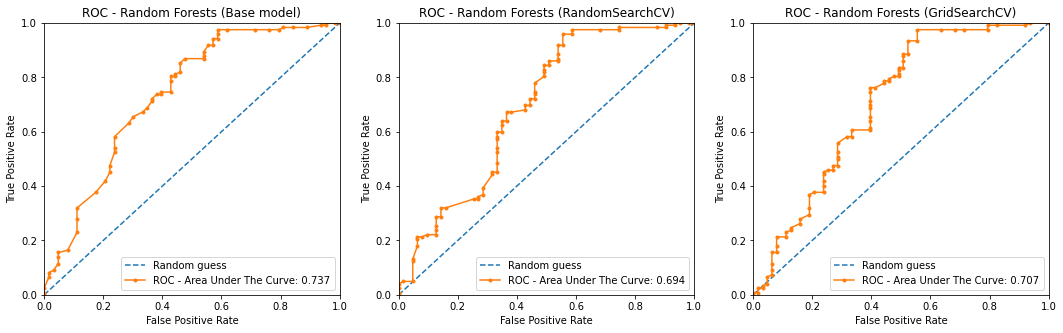

In [156]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

# Calling the above function to get ROC curves for each model
plot_rocs(y_test_01, rfc_prob, ROC_area_rfc, 
          ax[0], 'ROC - Random Forests (Base model)')

plot_rocs(y_test_01, random_search_rfc_prob, ROC_area_random_search_rfc,
          ax[1], 'ROC - Random Forests (RandomSearchCV)')

plot_rocs(y_test_01, grid_search_rfc_prob, ROC_area_grid_search_rfc, 
          ax[2], 'ROC - Random Forests (GridSearchCV)')

**Author's Note:** There doesn't seem like a huge difference between the three. However the base model offers the highest 

### Training Support Vector Machine

#### Training SVM with outliers

In [89]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [90]:
svm_pred = svm_model.predict(X_test)

In [91]:
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

[[ 21  42]
 [  6 116]]
              precision    recall  f1-score   support

           0       0.78      0.33      0.47        63
           1       0.73      0.95      0.83       122

    accuracy                           0.74       185
   macro avg       0.76      0.64      0.65       185
weighted avg       0.75      0.74      0.71       185



#### Training SVM without outliers
<a id='test'></a>

In [87]:
svm_model_1 = SVC(kernel = 'linear')
svm_model_1.fit(X_train_1,y_train_1)

SVC(kernel='linear')

In [88]:
svm_pred_1 = svm_model_1.predict(X_test_1)
print(confusion_matrix(y_test_1,svm_pred_1))
print(classification_report(y_test_1,svm_pred_1))

[[ 8 27]
 [ 1 98]]
              precision    recall  f1-score   support

           0       0.89      0.23      0.36        35
           1       0.78      0.99      0.88        99

    accuracy                           0.79       134
   macro avg       0.84      0.61      0.62       134
weighted avg       0.81      0.79      0.74       134



In [36]:
## Saving Model using pickle

In [99]:
import pickle
#pickle.dump(model, open('finalized_model.sav', 'wb'))